# Linear Regression 
This is the sum of the weighted input features, plus the **bias term**

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
# original data points
np.random.seed(7)
X= 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

In [3]:
y[:5], X[:5]

(array([[ 4.52710181],
        [ 9.03658338],
        [ 7.44328494],
        [ 8.7684959 ],
        [10.46779151]]),
 array([[0.15261658],
        [1.55983758],
        [0.87681846],
        [1.44693036],
        [1.95597902]]))

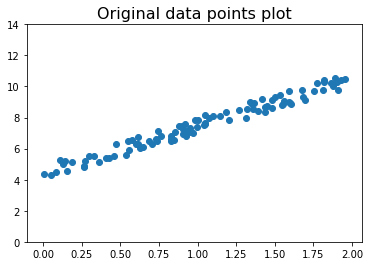

In [4]:
plt.scatter(X, y)
plt.title('Original data points plot', fontsize=16)
plt.ylim((0.0, 14))
plt.show()

### calculating theta

$theta = ($transpose($X).$X)-1 .dot(transpose(X)).dot(y)

In [5]:
X_b = np.c_[np.ones((100, 1)), X]
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta

array([[4.3722872 ],
       [3.08799552]])

### Making predictions using theta

$y(predict) =  $theta.dot(X_new)

In [6]:
np.random.seed(7)
X_new = np.random.rand(100, 1)*2
X_new_b = np.c_[np.ones((100, 1)), X_new]
y_predict = X_new_b.dot(theta)
y_predict[:5]

array([[ 4.84356651],
       [ 9.18905867],
       [ 7.07989869],
       [ 8.84040166],
       [10.41234167]])

In [7]:
X[:5], y[:5]

(array([[0.15261658],
        [1.55983758],
        [0.87681846],
        [1.44693036],
        [1.95597902]]),
 array([[ 4.52710181],
        [ 9.03658338],
        [ 7.44328494],
        [ 8.7684959 ],
        [10.46779151]]))

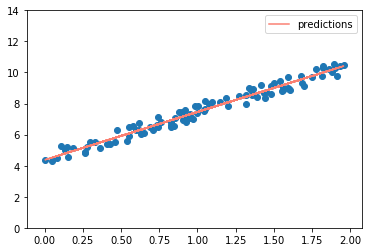

In [8]:
plt.plot(X_new, y_predict, color='salmon', label='predictions')
plt.scatter(X, y)
plt.ylim((0.0, 14))
plt.legend()
plt.show()

In [93]:
lin_reg = LinearRegression().fit(X, y)

In [10]:
lin_reg.intercept_, lin_reg.coef_

(array([4.3722872]), array([[3.08799552]]))

In [11]:
# manually making predictions on the 1st five values of the input feature 
# with the values of the models intercept_ (bias term) and coef_ (feature weights)
y_predict2 = []
for x in X_new[:5]:
    y_predict2.append(lin_reg.intercept_ + (lin_reg.coef_ * x).sum())
np.array(y_predict2)

array([[ 4.84356651],
       [ 9.18905867],
       [ 7.07989869],
       [ 8.84040166],
       [10.41234167]])

### Implementing a gradient descent

To implement a gradient descent the partial derivative of the cost function needs to be first computed.

$ MSE(theta) = $2/m * X(transpose).dot(theta.dot(X) - y)

**`Where`**
>theta = random generated initail number.

>X = input features

>y = input labels    
>m = number of instance

Then the gradient descent is calculating with the value of a learning rate.

$theta(nextstep) = n$(MSE(theta))

`where`
>    n = eta (learning rate)

In [12]:
eta = 0.1
m = 100
n_iter = 100
theta = np.random.rand(2, 1)
for n in range(n_iter):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[4.28355528],
       [3.16310452]])

# Polynomial Regression

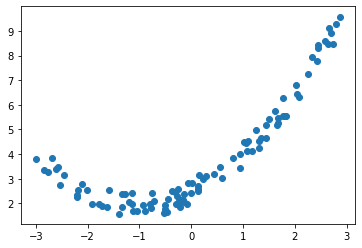

In [145]:
np.random.seed(7)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)

plt.scatter(X, y)
plt.show()

In [146]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_scaled = poly_features.fit_transform(X)
X_scaled[0], X[0]

(array([-2.54215026,  6.46252796]), array([-2.54215026]))

In [147]:
lin_reg = LinearRegression().fit(X_scaled, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.46489894]), array([[1.02952525, 0.49817729]]))

In [148]:
lin_reg.score(X_scaled, y)

0.981320333750341

In [156]:
from sklearn.model_selection import cross_val_score
cross_val_score(lin_reg, X_scaled, y,  cv=3).mean()

0.9796669355993671